# 你的第一个卷积神经网络
## 导入

In [1]:
import os
import numpy as np
import tensorflow as tf

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

## 数据

In [2]:
NUM_CLASSES = 10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = tf.keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, NUM_CLASSES)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 10), (10000, 32, 32, 3), (10000, 10))

## 网络结构

In [3]:
input_layer = tf.keras.Input(shape=(32, 32, 3))
conv_layer_1 = tf.keras.layers.Conv2D(filters=10, kernel_size=(4, 4), strides=2, padding="same")(input_layer)
conv_layer_2 = tf.keras.layers.Conv2D(filters=20, kernel_size=(3, 3), strides=2, padding="same")(conv_layer_1)
flatten_layer = tf.keras.layers.Flatten()(conv_layer_2)
output_layer = tf.keras.layers.Dense(units=10, activation="softmax")(flatten_layer)

model = tf.keras.Model(input_layer, output_layer)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 16, 16, 10)        490       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 20)          1820      
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 15,120
Trainable params: 15,120
Non-trainable params: 0
_________________________________________________________________


In [4]:
input_layer = tf.keras.Input((32, 32, 3))
conv1 = tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same")(input_layer)
conv1 = tf.keras.layers.BatchNormalization()(conv1)
conv1 = tf.keras.layers.LeakyReLU()(conv1)
conv2 = tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=2, padding="same")(conv1)
conv2 = tf.keras.layers.BatchNormalization()(conv2)
conv2 = tf.keras.layers.LeakyReLU()(conv2)
conv3 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same")(conv2)
conv3 = tf.keras.layers.BatchNormalization()(conv3)
conv3 = tf.keras.layers.LeakyReLU()(conv3)
conv4 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=2, padding="same")(conv3)
conv4 = tf.keras.layers.BatchNormalization()(conv4)
conv4 = tf.keras.layers.LeakyReLU()(conv4)
flatten_layer = tf.keras.layers.Flatten()(conv4)
dense1 = tf.keras.layers.Dense(128)(flatten_layer)
dense1 = tf.keras.layers.BatchNormalization()(dense1)
dense1 = tf.keras.layers.LeakyReLU()(dense1)
dense1 = tf.keras.layers.Dropout(rate=0.5)(dense1)
dense2 = tf.keras.layers.Dense(NUM_CLASSES)(dense1)
output_layer = tf.keras.layers.Activation("softmax")(dense2)

model = tf.keras.Model(input_layer, output_layer)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                           

## 训练

In [5]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 18s 10ms/step - loss: 1.5789 - accuracy: 0.4476 - val_loss: 1.2484 - val_accuracy: 0.5524
Epoch 2/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.1766 - accuracy: 0.5847 - val_loss: 1.5807 - val_accuracy: 0.4834
Epoch 3/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0159 - accuracy: 0.6440 - val_loss: 1.0265 - val_accuracy: 0.6409
Epoch 4/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.9201 - accuracy: 0.6792 - val_loss: 1.0418 - val_accuracy: 0.6407
Epoch 5/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.8578 - accuracy: 0.7010 - val_loss: 0.8473 - val_accuracy: 0.7062
Epoch 6/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.8126 - accuracy: 0.7148 - val_loss: 0.8198 - val_accuracy: 0.7131
Epoch 7/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.7587 - accuracy: 0.7369 - val_loss: 0.9240 -

## 分析

In [6]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.8710 - accuracy: 0.7043


[0.8710238337516785, 0.7042999863624573]

In [7]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

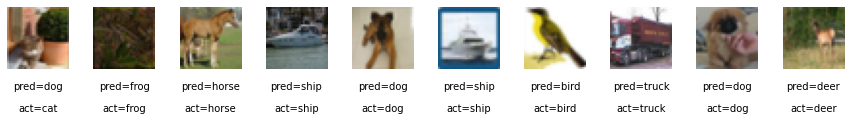

In [8]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis("off")
    ax.text(0.5, -0.35, "pred=" + str(preds_single[idx]), fontsize=10, ha="center", transform=ax.transAxes)
    ax.text(0.5, -0.7, "act=" + str(actual_single[idx]), fontsize=10, ha="center", transform=ax.transAxes)
    ax.imshow(img)